In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("E:\insideAIML\ML\FuelConsumption.csv")

In [3]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
x=df[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']].values
y = df['CO2EMISSIONS'].values

In [8]:
x.shape

(1067, 3)

In [7]:
from sklearn.model_selection import train_test_split 
from sklearnex.linear_model import LinearRegression 
from sklearn.metrics import r2_score 

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.2, random_state=50)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.8397194495148007

# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=1)   # 3 col will get decompose in 1 col without changing info 

In [17]:
x_new = pca.fit_transform(x)

In [18]:
x_new.shape   # see 

(1067, 1)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_new , y ,test_size=0.2, random_state=50)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.8337914745441817

## bese_fit_line

In [20]:
import matplotlib.pyplot as plt

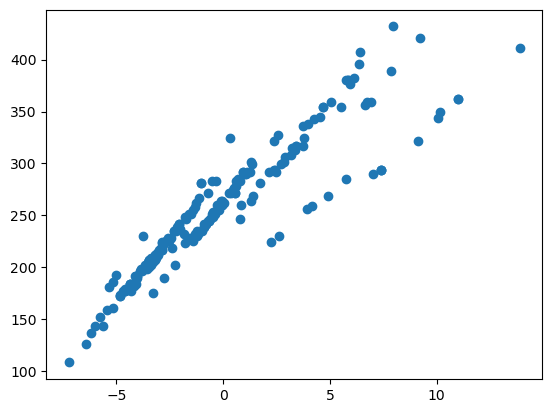

In [21]:
plt.scatter(x_test,y_test)

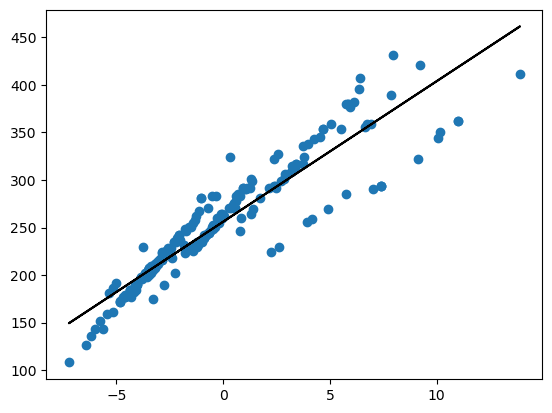

In [22]:
plt.scatter(x_test,y_test) 
plt.plot( x_test , lr.coef_[0] * x_test + lr.intercept_   , c="black")       # y = m x + c 

# wrt more col 

In [48]:
x1=df[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS' , 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']].values
y1 = df['CO2EMISSIONS'].values

In [49]:
x1.shape

(1067, 7)

In [50]:
from sklearn.decomposition import PCA 

In [51]:
pca1 =PCA(n_components=1)

In [52]:
pca1.fit_transform(x1)

array([[ 9.26015081],
       [ 4.82236482],
       [23.63710931],
       ...,
       [-2.01955803],
       [-0.6603555 ],
       [-4.84888101]])

In [53]:
iv =pca1.fit_transform(x1)

In [54]:
iv.shape

(1067, 1)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(iv , y ,test_size=0.2, random_state=50)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.8452248644873626

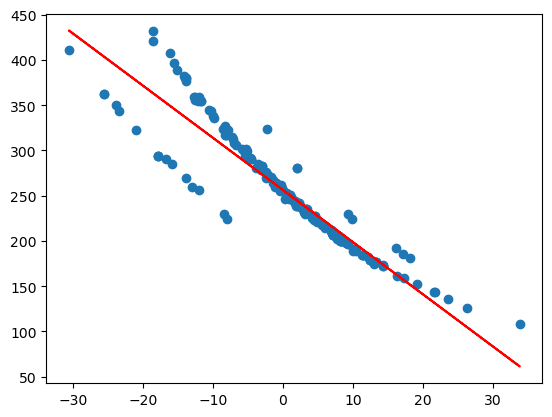

In [56]:
plt.scatter(x_test,y_test) 
plt.plot( x_test , lr.coef_[0] * x_test + lr.intercept_   , c="r")       # y = m x + c 